## <center> 数据挖掘第三次课程作业 <center>
####     <p style="text-align:right"> 吴嘉豪   _3220190894_ </p>
## Video Game Sales 电子游戏销售分析 
### 1. python库引入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
import sys
sys.path.append(r'F:\course\socialnetwork\Final\python')
import GM11
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  

## 2. 处理数据集 - Video Game Sales 电子游戏销售分析

__1. 数据集分析:__   
该数据集是由vgchartz.com所版生成的一份综合的游戏行业销售数据，并希望可以由此产生一份综合的游戏行业报告。数据标志中包括了网站所收集的游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。下面对数据集进行简单的电子游戏市场分析，分析对象包括受欢迎的游戏、类型、发布平台、发行人等；

In [2]:
vgs = pd.read_csv('F:\\course\\web\\data\\vgsales\\vgsales.csv',index_col = 0)
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


对该数据集进行数据清洗，统计并删去所有含有Nan的数据行，有下面可以看出所含有nan个数的行数有限，因此可以做出删除。同时将年份数据转换为到统计时中的时间数据列(2020)，便于后续计算。

In [3]:
vgs_new = vgs.dropna(how='any',inplace=False)
print("含有nan的行数个数：" , len(vgs) - len(vgs_new))
vgs_new["Year"] = vgs_new["Year"].apply(int)
print("最近的有戏发行年份： " , max(vgs_new["Year"]))
vgs_new["Age"] = 2020 - vgs_new["Year"] + 1
print("Age 统计:")
print(vgs_new["Age"].value_counts()[:5])
vgs_new.drop(labels=["Year"],axis = 1)

含有nan的行数个数： 307
最近的有戏发行年份：  2020
Age 统计:
12    1431
13    1428
11    1257
14    1201
10    1136
Name: Age, dtype: int64


,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Age
Rank,,,,,,,,,,
1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,15
2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,36
3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,13
4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,12
5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,25
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,19
16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,18
16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01,13


对这个整理的新表分析最受到欢迎的游戏、类型、发布平台、发行人等因素，分析过程如下：

In [4]:
vgs_new.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Age
count,16291,16291,16291.000000,16291,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
unique,11325,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,2131,NaN,3251,1339,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.405561,NaN,NaN,0.265647,0.147731,0.078833,0.048426,0.540910,14.594439
std,NaN,NaN,5.832412,NaN,NaN,0.822432,0.509303,0.311879,0.190083,1.567345,5.832412
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,11.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,14.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000,18.000000


从上表与以下程序的结果中可以简单对该属性中分布可以做出分析：  
- 从整体上来看，欧美日三大市场的销售记录呈现较为不均匀的分布，相比而言几大市场中北美市场的平均销量最高，销量最大值也最高，而日本市场平均销量与最大销量相对于该三大市场而言也最低。

In [5]:
# 最受到欢迎的游戏
print("北美市场最受欢迎的游戏：")
vgs_new[["Name","Platform","Age","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Global_Sales"]].nlargest(5,"NA_Sales")

北美市场最受欢迎的游戏：


,Name,Platform,Age,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,15,Sports,Nintendo,41.49,29.02,3.77,82.74
2,Super Mario Bros.,NES,36,Platform,Nintendo,29.08,3.58,6.81,40.24
10,Duck Hunt,NES,37,Shooter,Nintendo,26.93,0.63,0.28,28.31
6,Tetris,GB,32,Puzzle,Nintendo,23.20,2.26,4.22,30.26
3,Mario Kart Wii,Wii,13,Racing,Nintendo,15.85,12.88,3.79,35.82


In [6]:
print("欧洲市场最受欢迎的游戏")
vgs_new[["Name","Platform","Age","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Global_Sales"]].nlargest(5,"EU_Sales")

欧洲市场最受欢迎的游戏


,Name,Platform,Age,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,15,Sports,Nintendo,41.49,29.02,3.77,82.74
3,Mario Kart Wii,Wii,13,Racing,Nintendo,15.85,12.88,3.79,35.82
4,Wii Sports Resort,Wii,12,Sports,Nintendo,15.75,11.01,3.28,33.00
11,Nintendogs,DS,16,Simulation,Nintendo,9.07,11.00,1.93,24.76
17,Grand Theft Auto V,PS3,8,Action,Take-Two Interactive,7.01,9.27,0.97,21.40


In [7]:
print("日本市场最受欢迎的游戏")
vgs_new[["Name","Platform","Age","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Global_Sales"]].nlargest(5,"JP_Sales")

日本市场最受欢迎的游戏


,Name,Platform,Age,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Rank,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,25,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
13,Pokemon Gold/Pokemon Silver,GB,22,Role-Playing,Nintendo,9.00,6.18,7.20,23.10
2,Super Mario Bros.,NES,36,Platform,Nintendo,29.08,3.58,6.81,40.24
7,New Super Mario Bros.,DS,15,Platform,Nintendo,11.38,9.23,6.50,30.01
21,Pokemon Diamond/Pokemon Pearl,DS,15,Role-Playing,Nintendo,6.42,4.52,6.04,18.36


In [8]:
print("全球市场最受欢迎的游戏")
vgs_new[["Name","Platform","Age","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Global_Sales"]].nlargest(5,"Global_Sales")

全球市场最受欢迎的游戏


,Name,Platform,Age,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,15,Sports,Nintendo,41.49,29.02,3.77,82.74
2,Super Mario Bros.,NES,36,Platform,Nintendo,29.08,3.58,6.81,40.24
3,Mario Kart Wii,Wii,13,Racing,Nintendo,15.85,12.88,3.79,35.82
4,Wii Sports Resort,Wii,12,Sports,Nintendo,15.75,11.01,3.28,33.00
5,Pokemon Red/Pokemon Blue,GB,25,Role-Playing,Nintendo,11.27,8.89,10.22,31.37


- 针对于最受欢迎的游戏而言，各大市场的最受欢迎游戏不尽相同，其中日本有何欧美市场有明显的区别。全球最受欢迎的五个游戏位分别为：Wii Sports、Super Mario Bros.、Mario Kart Wii、Wii Sports Resort和Pokemon Red/Pokemon Blue。而日本市场主要的青睐对象为马里奥与宝可梦相关游戏，而在前两个统计中欧美也会倾向于类似GTA5这样的大作，对近年来受欢迎游戏的相关可视化请详见最后一个部分。

In [9]:
# 最受欢迎的发游戏类型

print("最受欢迎的游戏类型：")
popular_platform = vgs_new.groupby(by=['Genre'])['Global_Sales'].sum()
print(popular_platform.sort_values(ascending = False)[:7])

# 最受欢迎的发行平台

print("最受欢迎的发行平台：")
popular_platform = vgs_new.groupby(by=['Publisher'])['Global_Sales'].sum()
print(popular_platform.sort_values(ascending = False)[:7])

# 最受欢迎的发行人

print("最受欢迎的发行方：")
popular_platform = vgs_new.groupby(by=['Platform'])['Global_Sales'].sum()
print(popular_platform.sort_values(ascending = False)[:7])

最受欢迎的游戏类型：
Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Name: Global_Sales, dtype: float64
最受欢迎的发行平台：
Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Take-Two Interactive            399.30
THQ                             340.44
Name: Global_Sales, dtype: float64
最受欢迎的发行方：
Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
Name: Global_Sales, dtype: float64


- 由上面的分析可以看出，以全球销量之和为统计对象，全球最受欢迎的游戏类型分别为：动作类、体育类与射击类游戏；全球最受欢迎的发行平台为任天堂、EA与Activision；全球最受欢迎的游戏平台/设备分别为PS2、X360和PS3，具体的可视化图详见第三节。  

至此，上面简要地分析了游戏市场的大致信息，更多的游戏平台及相关分析详见第三节可视化中结合图表进行进一步说明。

__2. 销售额分析:__   
在得到了相应的往年销售额及对应的游戏市场相关信息，这部分需要对市场每年电子游戏销售额进行预测。

In [10]:
# 灰度算法预测未来五年的销量
sales = vgs_new.groupby(by=['Year'])['Global_Sales'].sum()[:-8]
print(sales)
input_x = sales.to_numpy()
predict_GM = GM11.GM11(input_x , 10)["predict"]["value"]
print("Future prediction by GM1.1:" , predict_GM)

Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    521.04
2007    609.92
2008    678.90
2009    667.30
2010    600.29
Name: Global_Sales, dtype: float64
Future prediction by GM1.1: [1164.88163102 1301.59850701 1454.36122292 1625.05300624 1815.77811033
 2028.88775523 2267.00911301 2533.07769501 2830.37354026 3162.56165105]


In [11]:
# Logistic regression
from sklearn.linear_model import LinearRegression

LR_Model = LinearRegression()
Year_X = sales.index.to_numpy()
Sales_X = sales.to_numpy()
Age_X = (Year_X - 1980).reshape(-1,1)
LR_Model.fit(Age_X, Sales_X)
Test_future = (np.arange(2011,2021) - 1980).reshape(-1,1)
predict_LR = LR_Model.predict(Test_future)
print("简单LR模型预测的序列结果为:")
print(predict_LR)

简单LR模型预测的序列结果为:
[578.07167742 600.30627823 622.54087903 644.77547984 667.01008065
 689.24468145 711.47928226 733.71388306 755.94848387 778.18308468]


In [12]:
# 利用SVR进行处理
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
model_svr = GridSearchCV(SVR(), param_grid={"kernel": ("linear", 'rbf', 'sigmoid'), "C": np.logspace(-3, 3, 7), "gamma": np.logspace(-3, 3, 7)})
model_svr.fit(Age_X, Sales_X)
predict_svr = model_svr.predict(Test_future)
print("简单SVR模型预测的序列结果为:")
print(predict_svr)

简单SVR模型预测的序列结果为:
[659.74757475 690.14754627 719.15225049 746.60361288 772.3601306
 796.29795359 818.31171881 838.31513246 856.24129916 872.0428012 ]


In [14]:
# 利用LSTM进行处理
import torch
import torch.nn as nn
from torch.autograd import Variable
import random
class Lstm(nn.Module):
    def __init__(self):
        super(Lstm,self).__init__() 
        self.lstm = nn.LSTM(12,10,2) 
        self.mid = nn.Linear(10,10) 
        self.relu = nn.ReLU(inplace = True)
        self.out = nn.Linear(10,1) 
    def forward(self,x):
        x1,_ = self.lstm(x)
        a,b,c = x1.shape
        mid = self.relu(self.mid(x1.view(-1,c)))
        out = self.out(mid) 
        out1 = out.view(a,b,-1) 
        return out1
def creat_dataset(dataset,look_back,train = True):
    data_x = []
    data_y = []
#     print(len(dataset))
    if train:
        for i in range(len(dataset)-look_back):
            data_x.append(dataset[i:i+look_back])
            data_y.append(dataset[i+look_back])
        return np.asarray(data_x), np.asarray(data_y)
    for i in range(len(dataset)-look_back+1):
        data_x.append(dataset[i:i+look_back])
    return np.asarray(data_x)

datasets = Sales_X[:-2].reshape(-1,1)
# print(datasets)
LSTM_X, LSTM_Y = creat_dataset(datasets ,12)
epoch = 10000
batch = 8
# print(LSTM_X)
x_train = LSTM_X.reshape(-1, 1, 12) 
y_train = LSTM_Y.reshape(-1, 1, 1)  
# print(x_train[5] , y_train[5])
# a = input()
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

lstm_model = Lstm()
optimizer = torch.optim.Adam(lstm_model.parameters(),lr = 1e-3)
loss_func = nn.MSELoss()
for i in range(epoch):
    var_x = Variable(x_train).type(torch.FloatTensor)
    var_y = Variable(y_train).type(torch.FloatTensor)
    out = lstm_model(var_x)
    loss = loss_func(out,var_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i==0 or (i+1) % 2000 == 0:
        print('Epoch:{}, Loss:{:.5f}'.format(i+1, loss.item()))

Epoch:1, Loss:126479.78125
Epoch:2000, Loss:14429.13379
Epoch:4000, Loss:607.17542
Epoch:6000, Loss:73.99867
Epoch:8000, Loss:0.68957
Epoch:10000, Loss:0.02913


In [15]:
predict_X = creat_dataset(datasets ,12,train = False)
predict_lstm = []
for i in range(10):
    predict_XF = torch.from_numpy(predict_X.reshape(-1, 1, 12)).float()
    predict_ans = lstm_model(predict_XF)
    predict_ans = predict_ans.reshape(-1)
#     print(predict_ans[-12:].reshape(1,12,1))
    temp = predict_ans[-12:].reshape(1,12,1).data.numpy()
    predict_lstm.append(temp.reshape(-1)[-1])
    predict_X = np.concatenate((predict_X , temp),axis = 0)
print("简单LSTM模型预测的序列结果为:")
print(predict_lstm)

简单LSTM模型预测的序列结果为:
[689.7653, 691.2961, 691.5081, 691.53754, 691.5417, 691.54224, 691.5423, 691.54236, 691.8636, 691.86884]


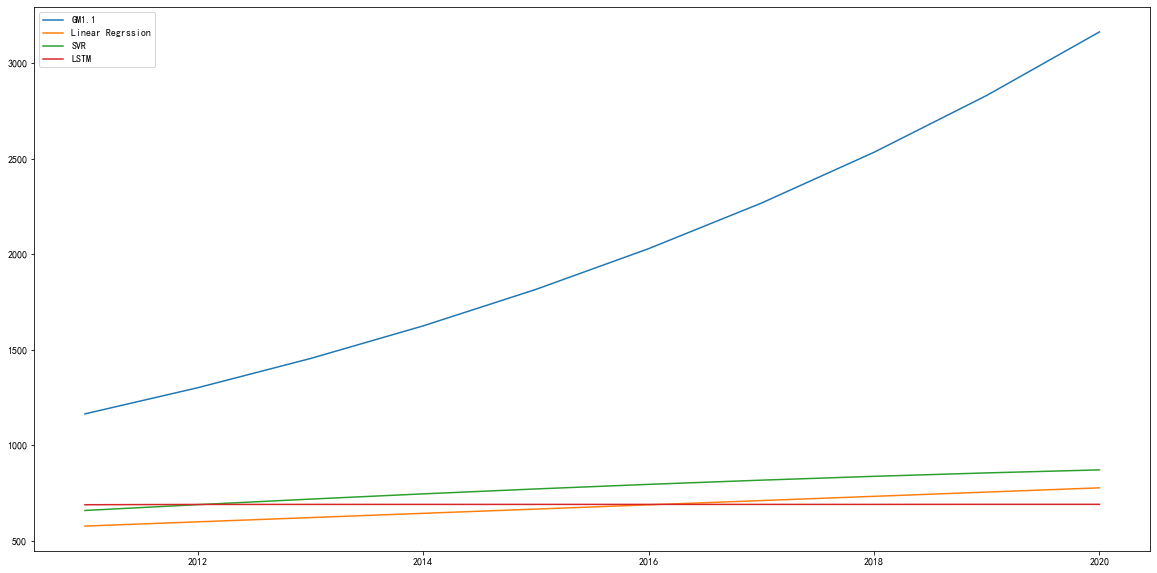

In [16]:
plt.figure(figsize=(20,10))
x = np.arange(2011,2021)
plt.plot(x,predict_GM)
plt.plot(x,predict_LR)
plt.plot(x,predict_svr)
plt.plot(x,predict_lstm)
plt.legend(["GM1.1","Linear Regrssion" , "SVR" , "LSTM"])
plt.show()

由上面的预测结果以及对应的趋势图中可以看出，Game sale未来的预测中SVR、LSTM与线性回归是比较可靠的，显示了未来十年内Game Sale依然会保持者一定的增长，2020年市场的游戏销量普遍认为将会超过800，而灰度模型算法可能鉴于其随机性的影响而导致模型拟合程度不足，不适合作为分析趋势的依据。

### __3. 可视化分析:__   
在得到了相应的往年销售额及对应的游戏市场相关信息，这部分将结合第一部分的分析，通过数据可视化等手段进行进一步的分析。

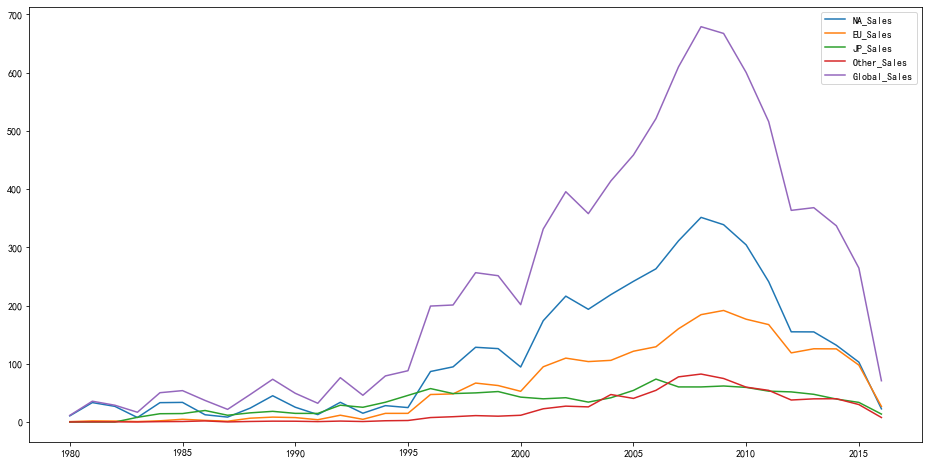

In [17]:
import seaborn
sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
sales_trend = pd.pivot_table(vgs_new,index='Year',values=sales,aggfunc=np.sum)
fig = plt.figure(figsize=(16,8))
# print(sales_trend)
year = np.arange(1980,2017)
plt.plot(year , sales_trend["NA_Sales"][:-2])
plt.plot(year , sales_trend["EU_Sales"][:-2])
plt.plot(year , sales_trend["JP_Sales"][:-2])
plt.plot(year , sales_trend["Other_Sales"][:-2])
plt.plot(year , sales_trend["Global_Sales"][:-2])
plt.legend(sales)
plt.show()

由上图我们可以发现矢仓的基本变化趋势具有较为明显的统一性，即不同市场下的波动情况几乎一致。另一方面，如同花顺那个面分析的那样，我们可以看出美欧市场仍然是游戏市场的主力，并基本呈现逐年上升的趋势。而之后的下降一方面可能是应为统计数据时间有限，一些新兴游戏上市时间有限的原因，同时可能也有部分游戏市场萎缩的影响因素。

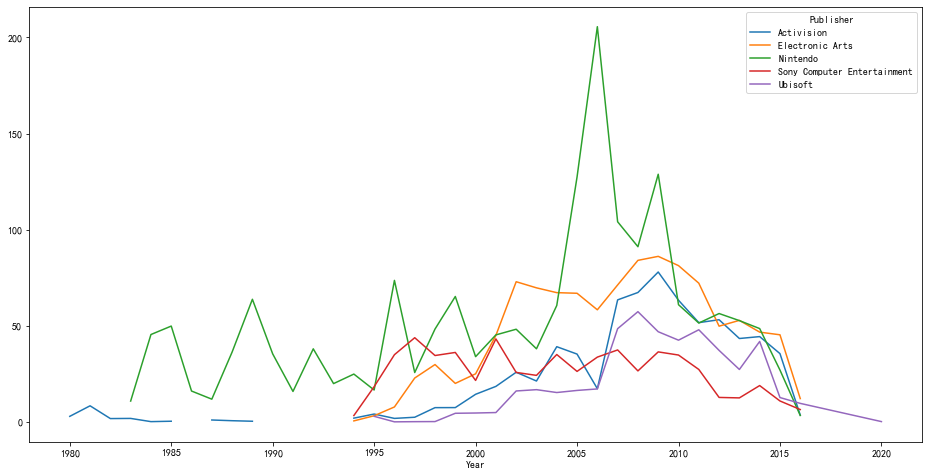

In [18]:
Publisher = ['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment','Ubisoft']
vgs_pub = vgs_new[vgs_new['Publisher'].isin(Publisher)]
vgs_pub = pd.pivot_table(data=vgs_pub,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
vgs_pub.plot(figsize=(16,8))
plt.show()

从该图中我们则可以看出，任天堂可以称得上是游戏发行商中的老牌强队，不但历史久远，同时也曾多次领跑游戏市场。而EA等其他游戏发行商也同样有着各自的波动时间，尤其是在05-10年间可以看出游戏发行商之间的竞争来得更为激烈。

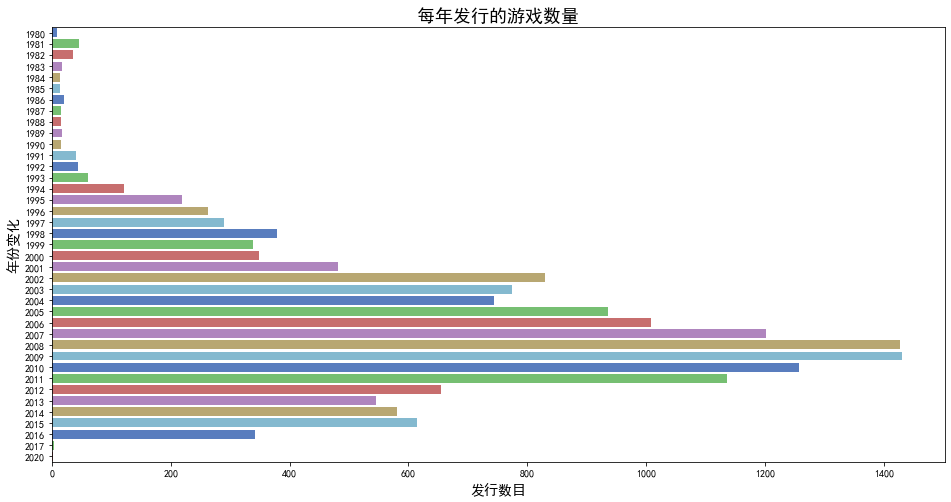

In [19]:
import seaborn as sns

game_year = vgs_new.groupby(['Year']).count()
game_year = game_year['Global_Sales']
year = game_year.index.astype(int)
plt.figure(figsize=(16,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = year, x = game_year, orient='h', palette=colors)
ax.set_xlabel(xlabel='发行数目', fontsize=14)
ax.set_ylabel(ylabel='年份变化', fontsize=14)
ax.set_title(label='每年发行的游戏数量', fontsize=18)
plt.show()

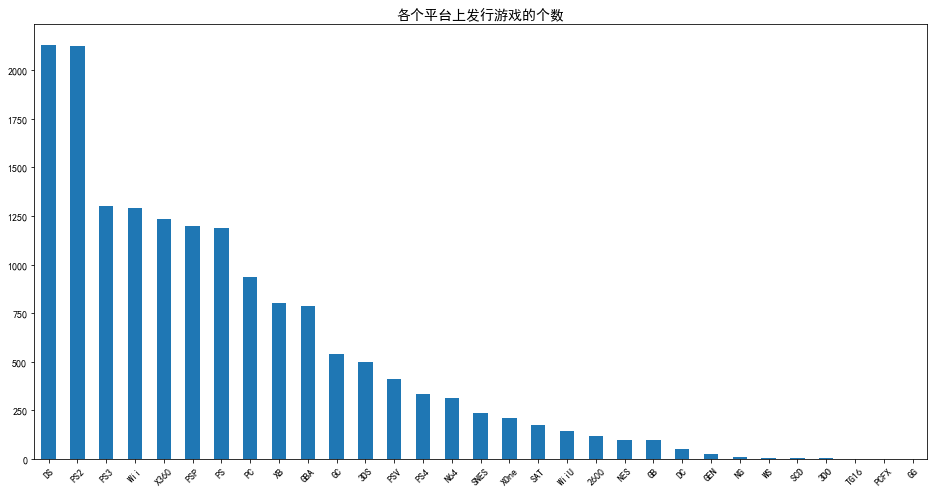

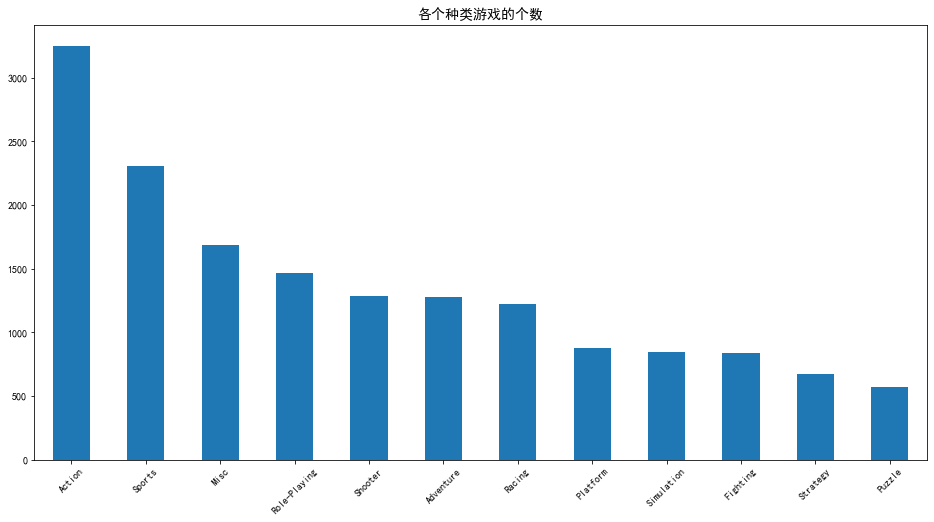

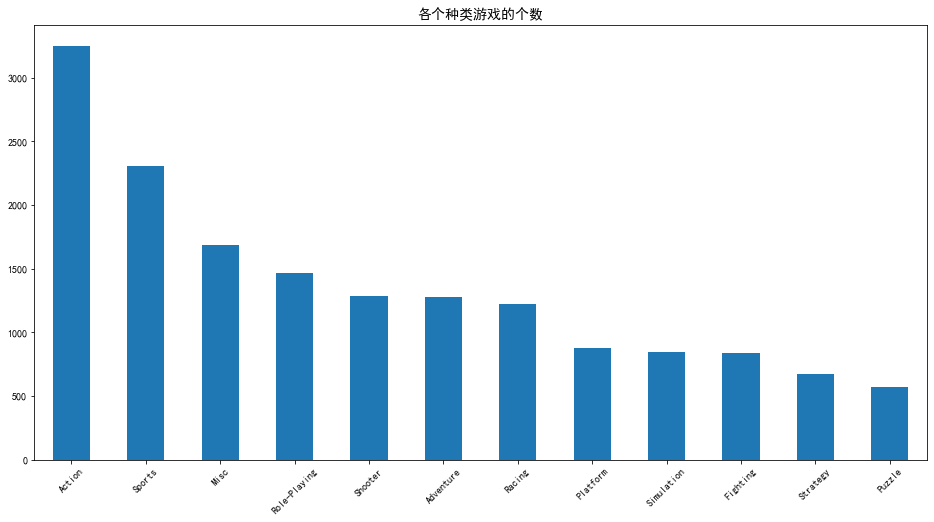

In [20]:
plt.figure(figsize=(16,8))
plat_data = vgs_new['Platform'].value_counts(sort=True)
plat_data.plot(kind = "bar")
plt.xticks(rotation=45)
plt.title("各个平台上发行游戏的个数",fontsize=14)
plt.show()

plt.figure(figsize=(16,8))
plat_data = vgs_new['Genre'].value_counts(sort=True)
plat_data.plot(kind = "bar")
plt.xticks(rotation=45)
plt.title("各个种类游戏的个数",fontsize=14)
plt.show()

plt.figure(figsize=(16,8))
plat_data = vgs_new['Genre'].value_counts(sort=True)
plat_data.plot(kind = "bar")
plt.xticks(rotation=45)
plt.title("各个种类游戏的个数",fontsize=14)
plt.show()

上面三张图向我们展示了往年游戏发售的整体走势，从游戏个数上面来看2008年附近的游戏发行数量达到峰值，代表着当时游戏市场的火热。而从平台角度上来看，30年来我们可以看出最受到欢迎的游戏平台包括DS\PS2\PS3\Wii\X360等游戏平台，而最受人们喜爱的游戏种类有包括动作类、体育类等类型的游戏，而策略类、解密类游戏则相对较少。

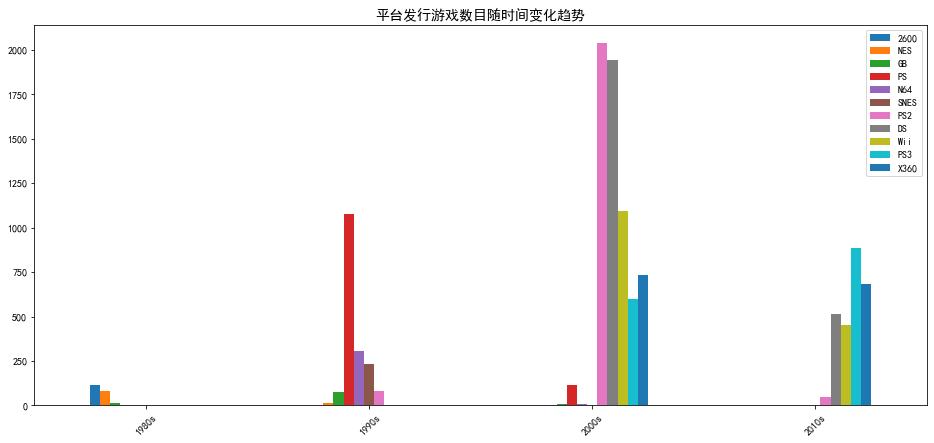

In [21]:
vgs1980s = vgs_new[vgs_new["Year"] <= 1990]
vgs1990s = vgs_new[(vgs_new["Year"] > 1990)&(vgs_new["Year"] <= 2000)]
vgs2000s = vgs_new[(vgs_new["Year"] > 2000)&(vgs_new["Year"] <= 2010)]
vgs2010s = vgs_new[vgs_new["Year"] >= 2010]

plat_data_1 = vgs1980s['Platform'].value_counts(sort=True).rename("1980s")
plat_data_2 = vgs1990s['Platform'].value_counts(sort=True).rename("1990s")
plat_data_3 = vgs2000s['Platform'].value_counts(sort=True).rename("2000s")
plat_data_4 = vgs2010s['Platform'].value_counts(sort=True).rename("2010s")

# print(plat_data_1,plat_data_2)
plat_year = pd.merge(plat_data_1,plat_data_2,left_index=True,right_index=True,how="outer")
plat_year = pd.merge(plat_year,plat_data_3,left_index=True,right_index=True,how="outer")
plat_year = pd.merge(plat_year,plat_data_4,left_index=True,right_index=True,how="outer")
plat_year = plat_year.fillna(0)
pt1 = plat_year.sort_values("1980s",ascending=False)[:3]
pt2 = plat_year.sort_values("1990s",ascending=False)[:3]
pt3 = plat_year.sort_values("2000s",ascending=False)[:3]
pt4 = plat_year.sort_values("2010s",ascending=False)[:3]
ptfinal = pd.concat([pt1,pt2,pt3,pt4]).drop_duplicates(subset = None,keep ='first',inplace = False)
ptfinal = ptfinal.T
ptfinal.plot(kind = "bar",figsize=(16,7))
plt.xticks(rotation=45)
plt.title("平台发行游戏数目随时间变化趋势",fontsize=14)
plt.show()

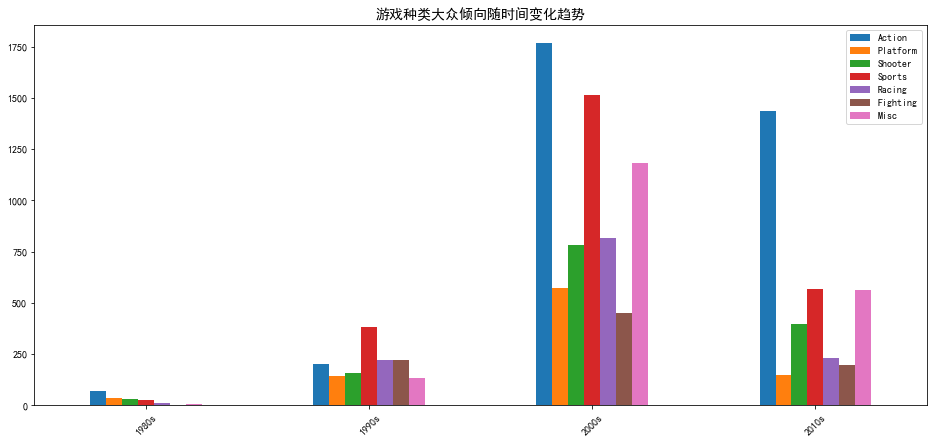

In [22]:
vgs1980s = vgs_new[vgs_new["Year"] <= 1990]
vgs1990s = vgs_new[(vgs_new["Year"] > 1990)&(vgs_new["Year"] <= 2000)]
vgs2000s = vgs_new[(vgs_new["Year"] > 2000)&(vgs_new["Year"] <= 2010)]
vgs2010s = vgs_new[vgs_new["Year"] >= 2010]

plat_data_1 = vgs1980s['Genre'].value_counts(sort=True).rename("1980s")
plat_data_2 = vgs1990s['Genre'].value_counts(sort=True).rename("1990s")
plat_data_3 = vgs2000s['Genre'].value_counts(sort=True).rename("2000s")
plat_data_4 = vgs2010s['Genre'].value_counts(sort=True).rename("2010s")

# print(plat_data_1,plat_data_2)
plat_Genre = pd.merge(plat_data_1,plat_data_2,left_index=True,right_index=True,how="outer")
plat_Genre = pd.merge(plat_Genre,plat_data_3,left_index=True,right_index=True,how="outer")
plat_Genre = pd.merge(plat_Genre,plat_data_4,left_index=True,right_index=True,how="outer")
plat_Genre = plat_Genre.fillna(0)
pt1 = plat_Genre.sort_values("1980s",ascending=False)[:3]
pt2 = plat_Genre.sort_values("1990s",ascending=False)[:3]
pt3 = plat_Genre.sort_values("2000s",ascending=False)[:3]
pt4 = plat_Genre.sort_values("2010s",ascending=False)[:3]
ptfinal = pd.concat([pt1,pt2,pt3,pt4]).drop_duplicates(subset = None,keep ='first',inplace = False)
ptfinal = ptfinal.T
ptfinal.plot(kind = "bar",figsize=(16,7))
plt.xticks(rotation=45)
plt.title("游戏种类大众倾向随时间变化趋势",fontsize=14)
plt.show()

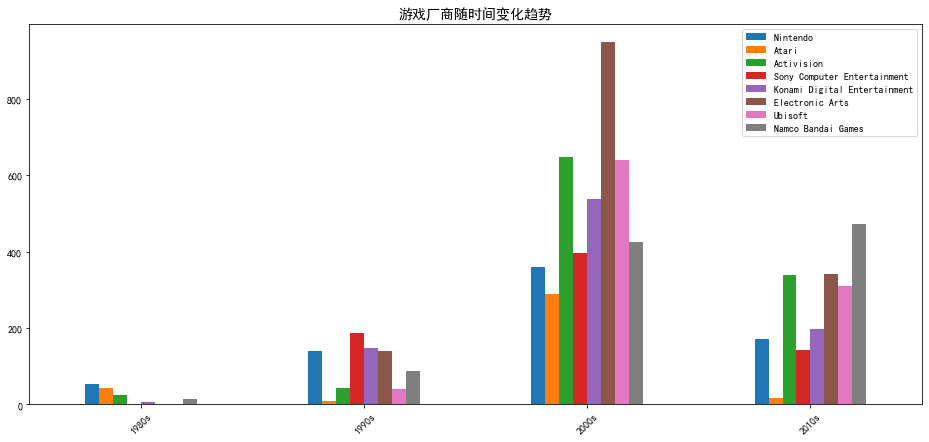

In [23]:
vgs1980s = vgs_new[vgs_new["Year"] <= 1990]
vgs1990s = vgs_new[(vgs_new["Year"] > 1990)&(vgs_new["Year"] <= 2000)]
vgs2000s = vgs_new[(vgs_new["Year"] > 2000)&(vgs_new["Year"] <= 2010)]
vgs2010s = vgs_new[vgs_new["Year"] >= 2010]

plat_data_1 = vgs1980s['Publisher'].value_counts(sort=True).rename("1980s")
plat_data_2 = vgs1990s['Publisher'].value_counts(sort=True).rename("1990s")
plat_data_3 = vgs2000s['Publisher'].value_counts(sort=True).rename("2000s")
plat_data_4 = vgs2010s['Publisher'].value_counts(sort=True).rename("2010s")

# print(plat_data_1,plat_data_2)
plat_Publisher = pd.merge(plat_data_1,plat_data_2,left_index=True,right_index=True,how="outer")
plat_Publisher = pd.merge(plat_Publisher,plat_data_3,left_index=True,right_index=True,how="outer")
plat_Publisher = pd.merge(plat_Publisher,plat_data_4,left_index=True,right_index=True,how="outer")
plat_Publisher = plat_Publisher.fillna(0)
pt1 = plat_Publisher.sort_values("1980s",ascending=False)[:3]
pt2 = plat_Publisher.sort_values("1990s",ascending=False)[:3]
pt3 = plat_Publisher.sort_values("2000s",ascending=False)[:3]
pt4 = plat_Publisher.sort_values("2010s",ascending=False)[:3]
ptfinal = pd.concat([pt1,pt2,pt3,pt4]).drop_duplicates(subset = None,keep ='first',inplace = False)
ptfinal = ptfinal.T
ptfinal.plot(kind = "bar",figsize=(16,7))
plt.xticks(rotation=45)
plt.title("游戏厂商随时间变化趋势",fontsize=14)
plt.show()

在上面几张图中我们就可以看出销售随着时间消费者的兴趣目标同样在发生的改变，在80年代当时的游戏可能与现在的差别还有很大，当时的游戏种类确实还很少，人们的选择还相当有限。而到了90与00年代，人们的主要倾向的游戏类别则是运动类与动作类的游戏。任天堂索尼这样的老牌游戏公司得到了迅速的发展。到了00年代结束乃至10年代，游戏的更新换代速度很快，人们已经抛弃了初代的设备诸如PS、PS2等，而是用PS3、X360、DS等这样的设备进行游戏，而与此对应的则是像育碧、EA这样的大型3A游戏公司的迅速崛起，人们在对动作、体育类游戏兴趣不减的同时，也同时对模拟经营这类的游戏产生了兴趣，诸如过山车之星乃至进来的动森也映证了这样的趋势。

__Github:__  https://github.com/FadedFate/Data_Homeworkw3